# Trabalho de Conclusão de Curso - TCC
### Turma - DSA T212
### Aluno : Drausio Gomes dos Santos
### Orientadora: Gabrielle Maria Romeiro Lombardi
### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
## Resultados Preliminares

### Etapa 4: Construção dos Grafos
<p> Construção das representações de estruturas organizacionais em grafos.</p>

#### Importando as bibliotecas

In [1]:
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install python-igraph

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz

class Main:     
    def show_current_time(self):
        ini = time.time()
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)  

main = Main()
    


igraph :  0.10.1


#### Criando data frames para cada ano

In [61]:
anos = [2019,2020,2021,2022]
base_path = "C:/projetos/tcc_dsa_usp_esalq/"
filtro0 = 'Ministério da Educação'
filtro1 = 'Universidade'
listaAno=[]
dfs = []
for ano in anos:
    anoRef = str(ano)
    data_frame_orig = pd.read_csv(base_path + "dados/dou/" + anoRef + "/" + anoRef +".csv")
    data_frame = data_frame_orig[data_frame_orig["emissor"].str.contains(filtro0)]
    data_frame = data_frame[data_frame["emissor"].str.contains(filtro1)]
    data_frame["entidades"] = data_frame["emissor"].str.split("/")
    listaAno.append({"ano":ano, "df": data_frame  })    
    dfs.append(data_frame_orig)

big_frame = pd.concat(dfs, ignore_index=True)

#### Montando os grafos direcionados por Ano utlizando IGraph

In [84]:
print("Início da criação dos grafos anuais.")    
main.show_current_time()
print("------------------------------------") 
for ano in anos:
    amostra = 50000
    g = ig.Graph(directed=True)
    contador_vertices = 0
    contador_arestas = 0
    g["name"]="Unidades Organizacionais da Administração Pública - " + str(ano)
    df_sample = listaAno[ano - 2019]["df"].sample(n=amostra)
    print("tamanho amostra: ", len(df_sample))
    for index, row in df_sample.iterrows(): 
        split_data = row["data"].split("/")
        dia = split_data[0]
        mes = split_data[1]
        ano = split_data[2]
        d = dt.date(int(ano),int(mes),int(dia))
        for index,ent in enumerate(row["entidades"]):        
            try:
                vert = g.vs.find(ent) 
                #vert["peso"] = vert["peso"] + 1
                #if ( d < vert["data_inicio"] ):
                #    vert["data_inicio"] = d
                #if ( d > vert["data_termino"] ):
                #    vert["data_termino"] = d
                #vert["tempo_medio"] = (vert["data_termino"] - vert["data_inicio"]) / vert["peso"]
            except:
                if  index < 2 :
                    g.add_vertices([ent])
                    vert = g.vs.find(ent)            
                    #vert["data_inicio"] =  d
                    #vert["data_termino"] =  d
                    vert["label"]=ent
                    #vert["peso"] =  1
                    #vert["tempo_medio"]=0.0
                    contador_vertices = contador_vertices + 1
    
        for (index,ent) in enumerate(row['entidades']):
            if len(row['entidades']) > index+1 and index < 1 :
                eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                            edge.target_vertex["name"] == row['entidades'][index+1] ) 
                #if len(eg) > 0:
                #eg[0]["peso"] = eg[0]["peso"] +  1
                #if ( d < eg[0]["data_inicio"] ):
                #    eg[0]["data_inicio"] = d                    
                #if ( d > eg[0]["data_termino"] ):
                #    eg[0]["data_termino"] = d
                #eg[0]["tempo_medio"] = (eg[0]["data_termino"] - eg[0]["data_inicio"])\
                #/ eg[0]["peso"]
                
                if not (len(eg) > 0):
                    g.add_edges([(ent , row['entidades'][index+1])])
                    #eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                    #        edge.target_vertex["name"] == row['entidades'][index+1] ) 
                    #eg[0]["data_inicio"] =  d
                    #eg[0]["data_termino"] =  d
                    #eg[0]["peso"] =  1
                    #eg[0]["tempo_medio"]=0.0
                    #contador_arestas = contador_arestas + 1        
        #print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas), end='\r' )
    #print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas) )
    print(g.summary())
    main.show_current_time()
    for vx in g.vs:
        print(vx.attributes())
        print("------------------------------------") 
    for es in g.es:
        print(len(g.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 
    with open("grafo"+str(ano)+".pkl", 'wb') as pickle_file:
        pickle.dump(g, pickle_file)
    print("------------------------------------")                 
print("Término da criação dos grafos anuais.")    
main.show_current_time()

Início da criação dos grafos anuais.
Current Time = 19/01/2023 20:41:40
------------------------------------
tamanho amostra:  50000
IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)
Current Time = 19/01/2023 20:41:56
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
{'name': 'Universidade Federal do Rio Grande do Norte', 'label': 'Universidade Federal do Rio Grande do Norte'}
------------------------------------
{'name': 'Fundação Universidade Federal do Rio Grande', 'label': 'Fundação Universidade Federal do Rio Grande'}
------------------------------------
{'name': 'Fundação Universidade Federal de Rondônia', 'label': 'Fundação Universidade Federal de Rondônia'}
------------------------------------
{'name': 'Universidade Federal de Santa Catarina', 'label': 'Universidade Federal de Santa Catarina'}
------------------------------------
{'name': 'Universidade Fede

IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)
Current Time = 19/01/2023 20:42:13
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
{'name': 'Universidade Federal do Rio de Janeiro', 'label': 'Universidade Federal do Rio de Janeiro'}
------------------------------------
{'name': 'Fundação Universidade do Amazonas', 'label': 'Fundação Universidade do Amazonas'}
------------------------------------
{'name': 'Universidade Tecnológica Federal do Paraná', 'label': 'Universidade Tecnológica Federal do Paraná'}
------------------------------------
{'name': 'Fundação Universidade de Brasília', 'label': 'Fundação Universidade de Brasília'}
------------------------------------
{'name': 'Universidade Federal de Pernambuco', 'label': 'Universidade Federal de Pernambuco'}
------------------------------------
{'name': 'Fundação Universidade Federal do Vale do São Francisco', 

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)
Current Time = 19/01/2023 20:42:31
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
{'name': 'Fundação Universidade Federal de Rondônia', 'label': 'Fundação Universidade Federal de Rondônia'}
------------------------------------
{'name': 'Universidade Federal de São Paulo', 'label': 'Universidade Federal de São Paulo'}
------------------------------------
{'name': 'Fundação Universidade Federal de Sergipe', 'label': 'Fundação Universidade Federal de Sergipe'}
------------------------------------
{'name': 'Fundação Universidade Federal da Grande Dourados', 'label': 'Fundação Universidade Federal da Grande Dourados'}
------------------------------------
{'name': 'Universidade Tecnológica Federal do Paraná', 'label': 'Universidade Tecnológica Federal do Paraná'}
------------------------------------
{'name': 'Fundação 

IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)
Current Time = 19/01/2023 20:42:48
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
{'name': 'Universidade Federal do Recôncavo da Bahia', 'label': 'Universidade Federal do Recôncavo da Bahia'}
------------------------------------
{'name': 'Universidade Federal do Rio de Janeiro', 'label': 'Universidade Federal do Rio de Janeiro'}
------------------------------------
{'name': 'Universidade Federal do Rio Grande do Sul', 'label': 'Universidade Federal do Rio Grande do Sul'}
------------------------------------
{'name': 'Universidade Federal de Santa Maria', 'label': 'Universidade Federal de Santa Maria'}
------------------------------------
{'name': 'Universidade Federal de Juiz de Fora', 'label': 'Universidade Federal de Juiz de Fora'}
------------------------------------
{'name': 'Fundação Universidade Federal do 

#### Visualizando os grafos

IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)


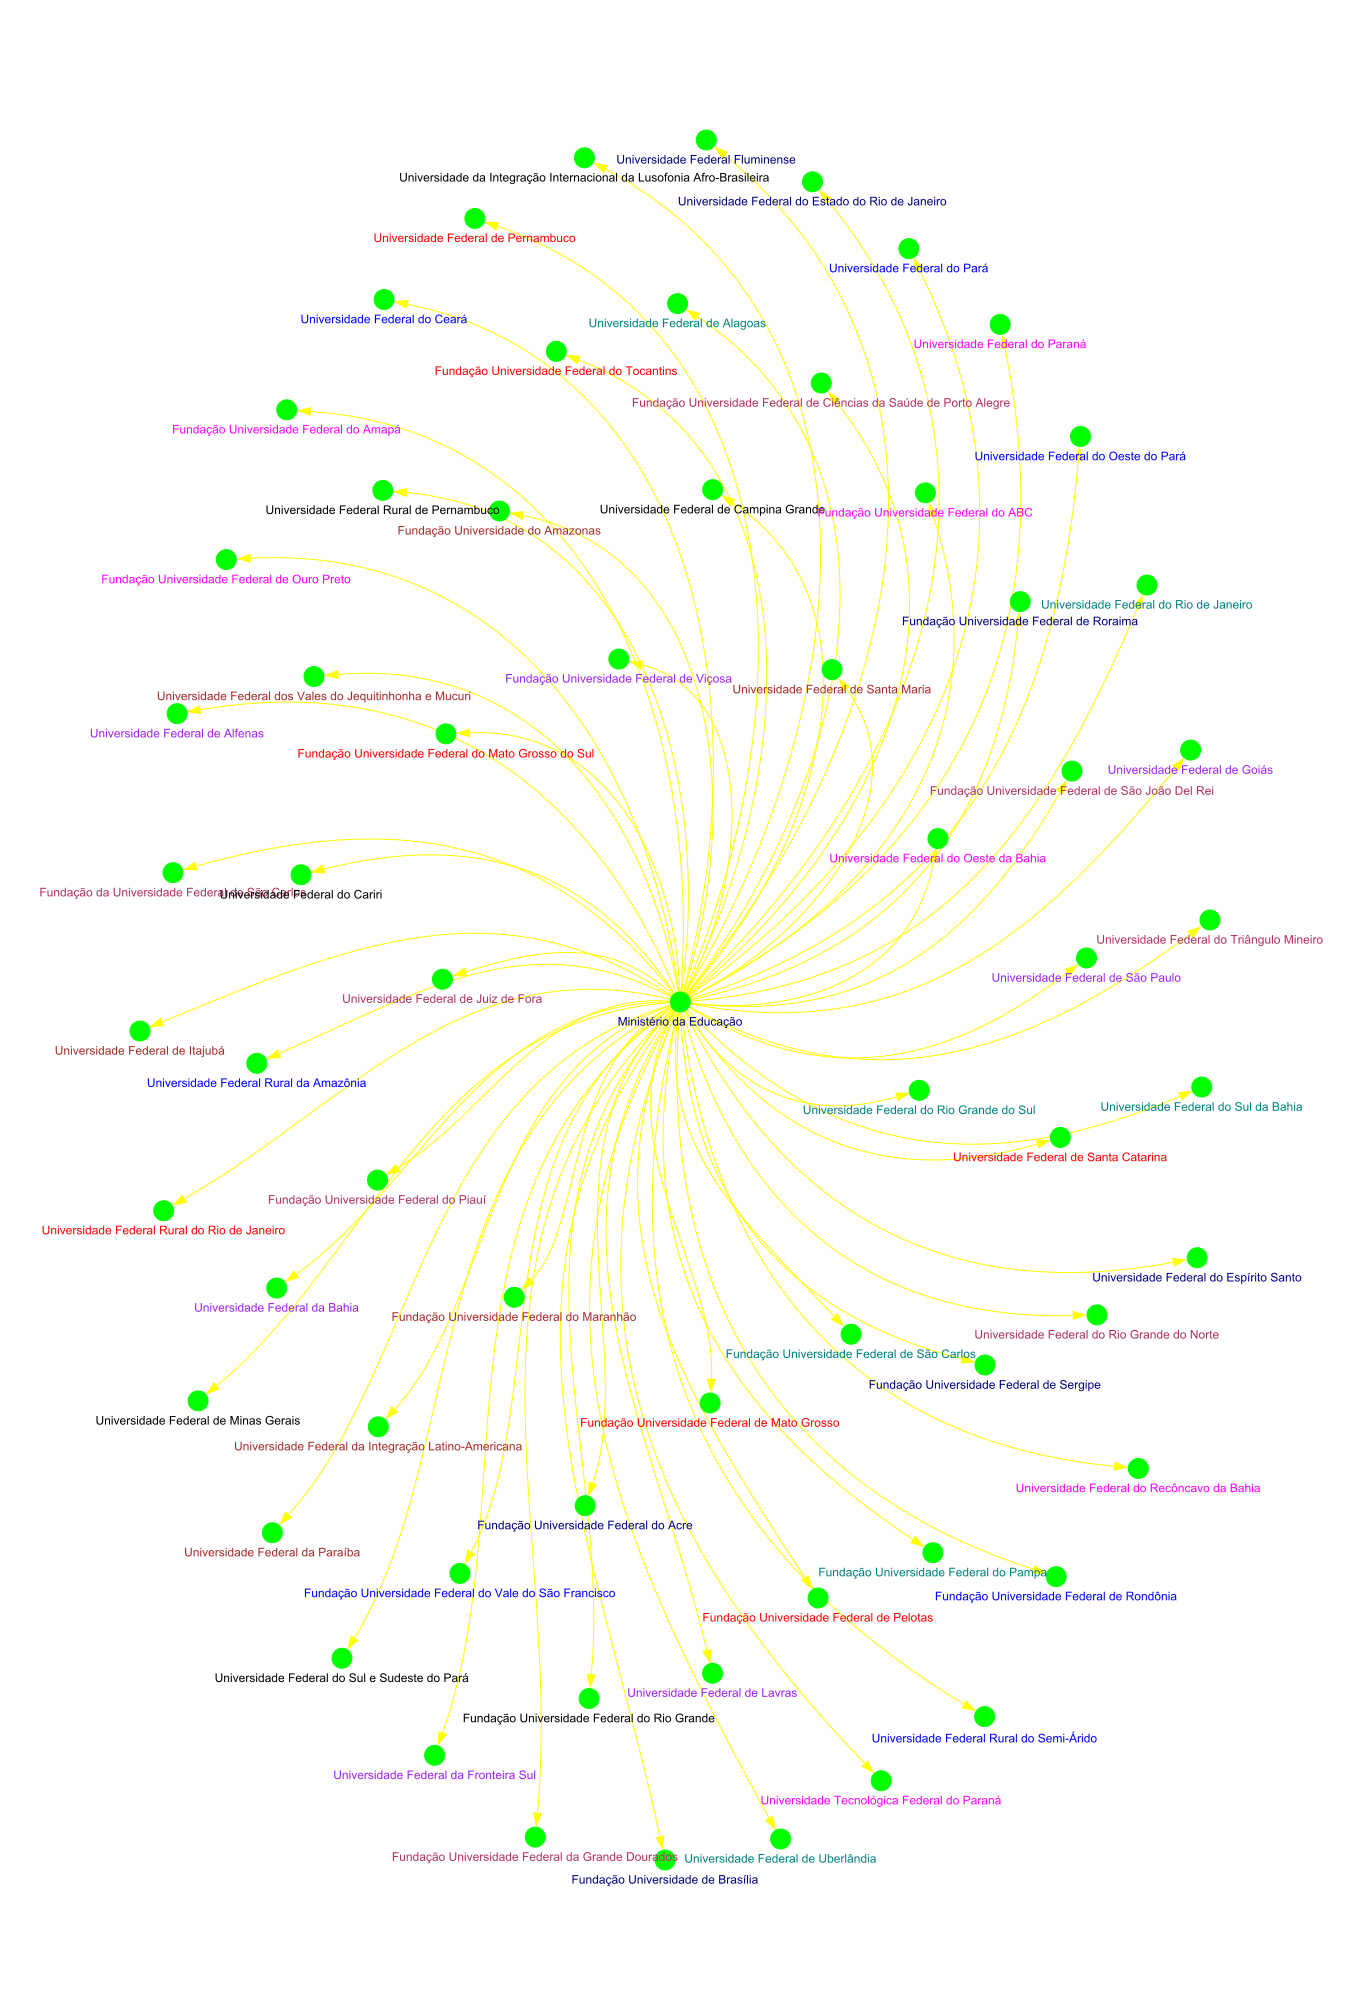

In [85]:
out_fig_name2019 = "grafo2019.eps"
grafo2019 = pickle.load(open("grafo2019.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2019.layout_reingold_tilford_circular()
print(grafo2019.summary())
plot(grafo2019, out_fig_name2019, **visual_style)

IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)


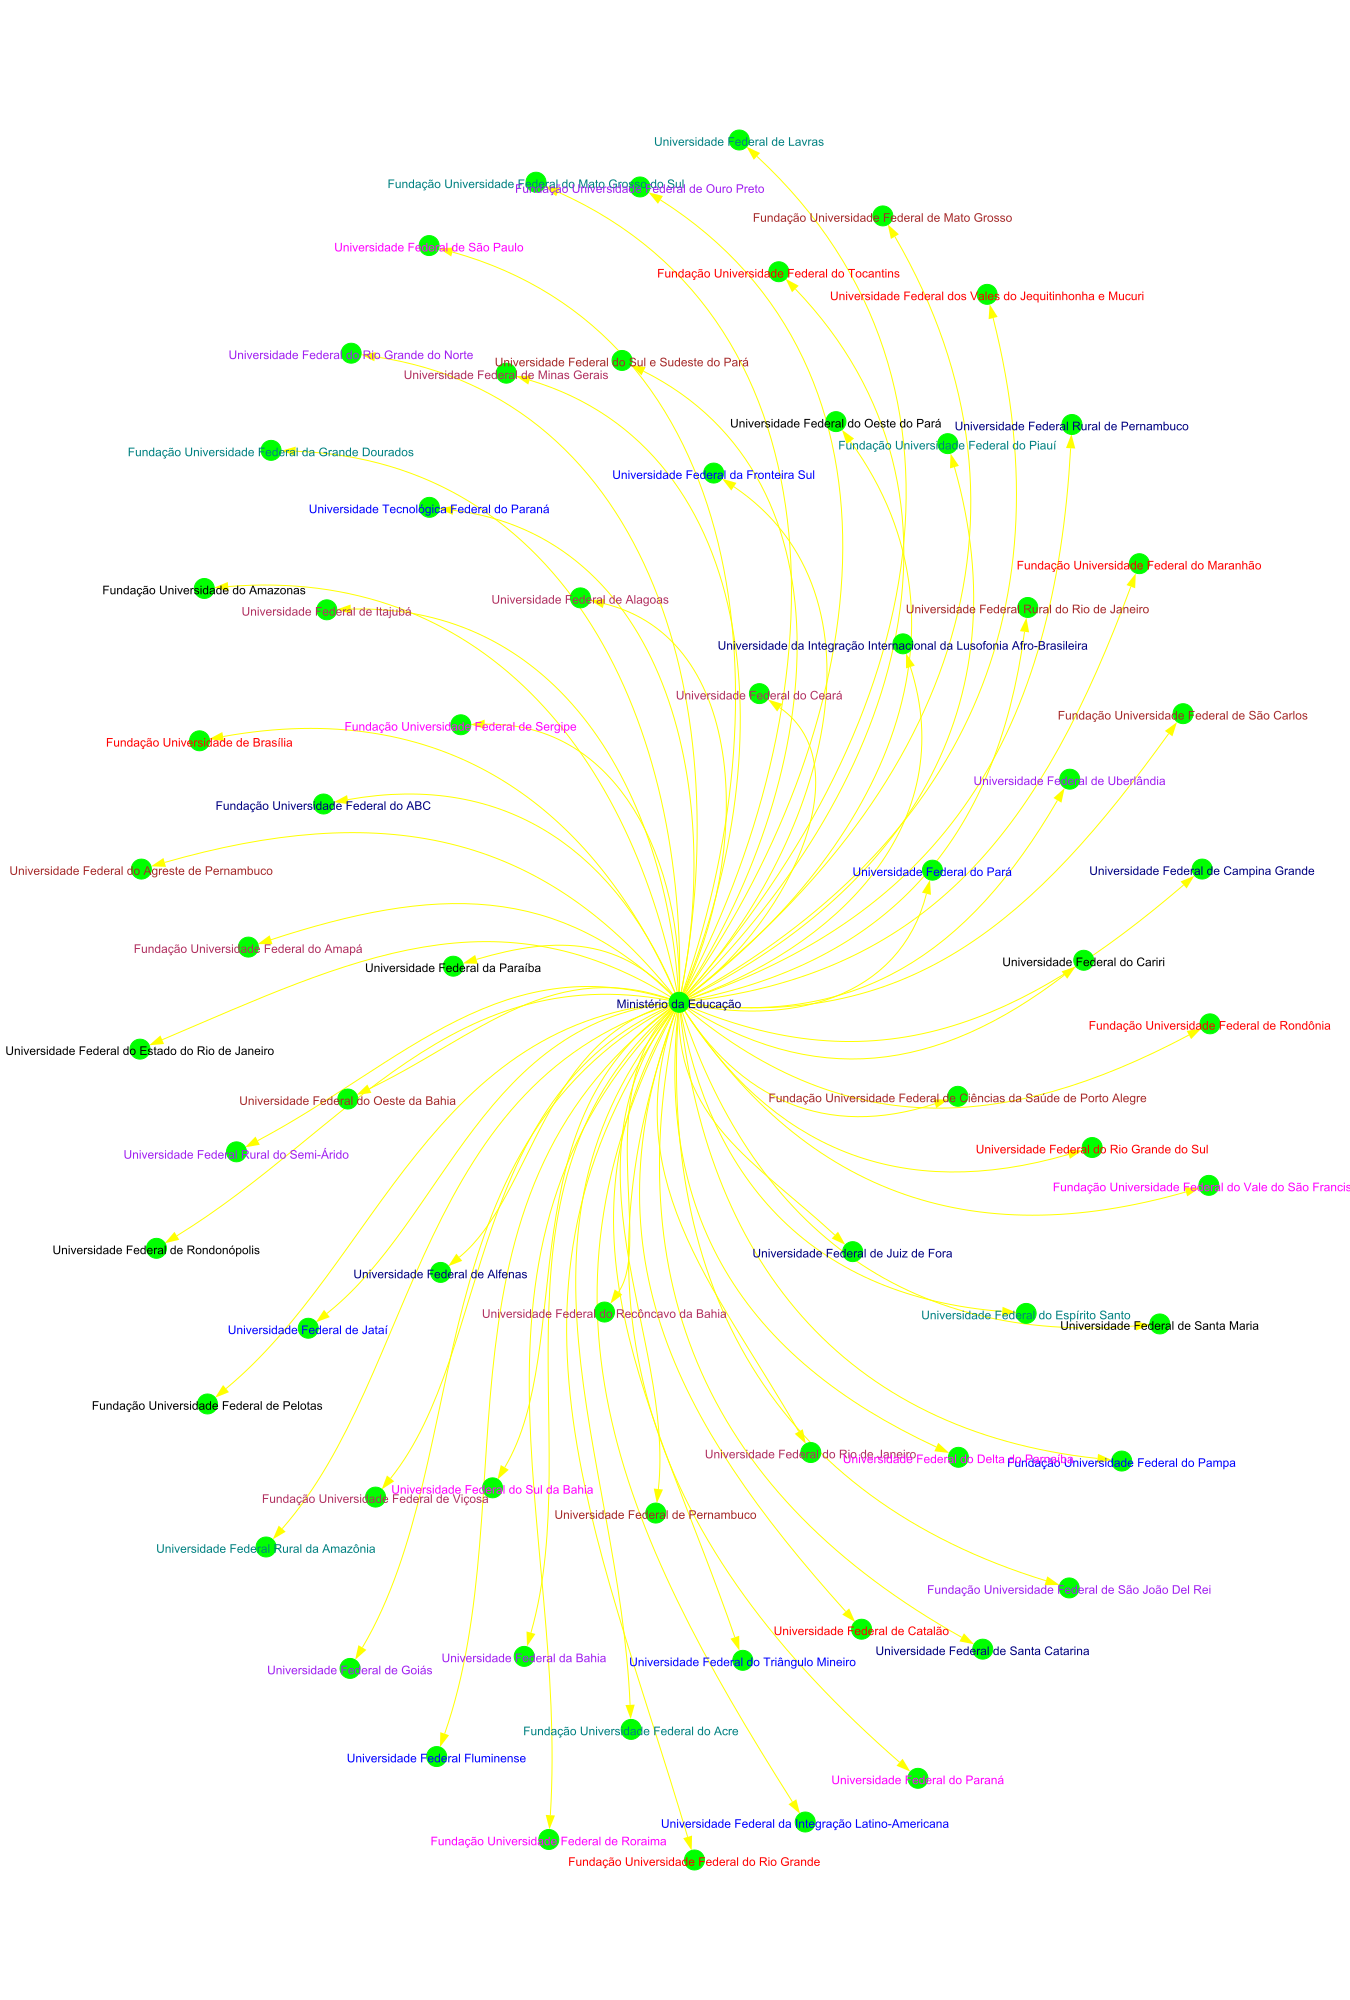

In [86]:
out_fig_name2020 = "grafo2020.eps"
grafo2020 = pickle.load(open("grafo2020.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2020.layout_reingold_tilford_circular()
print(grafo2020.summary())
plot(grafo2020, out_fig_name2020, **visual_style)

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)


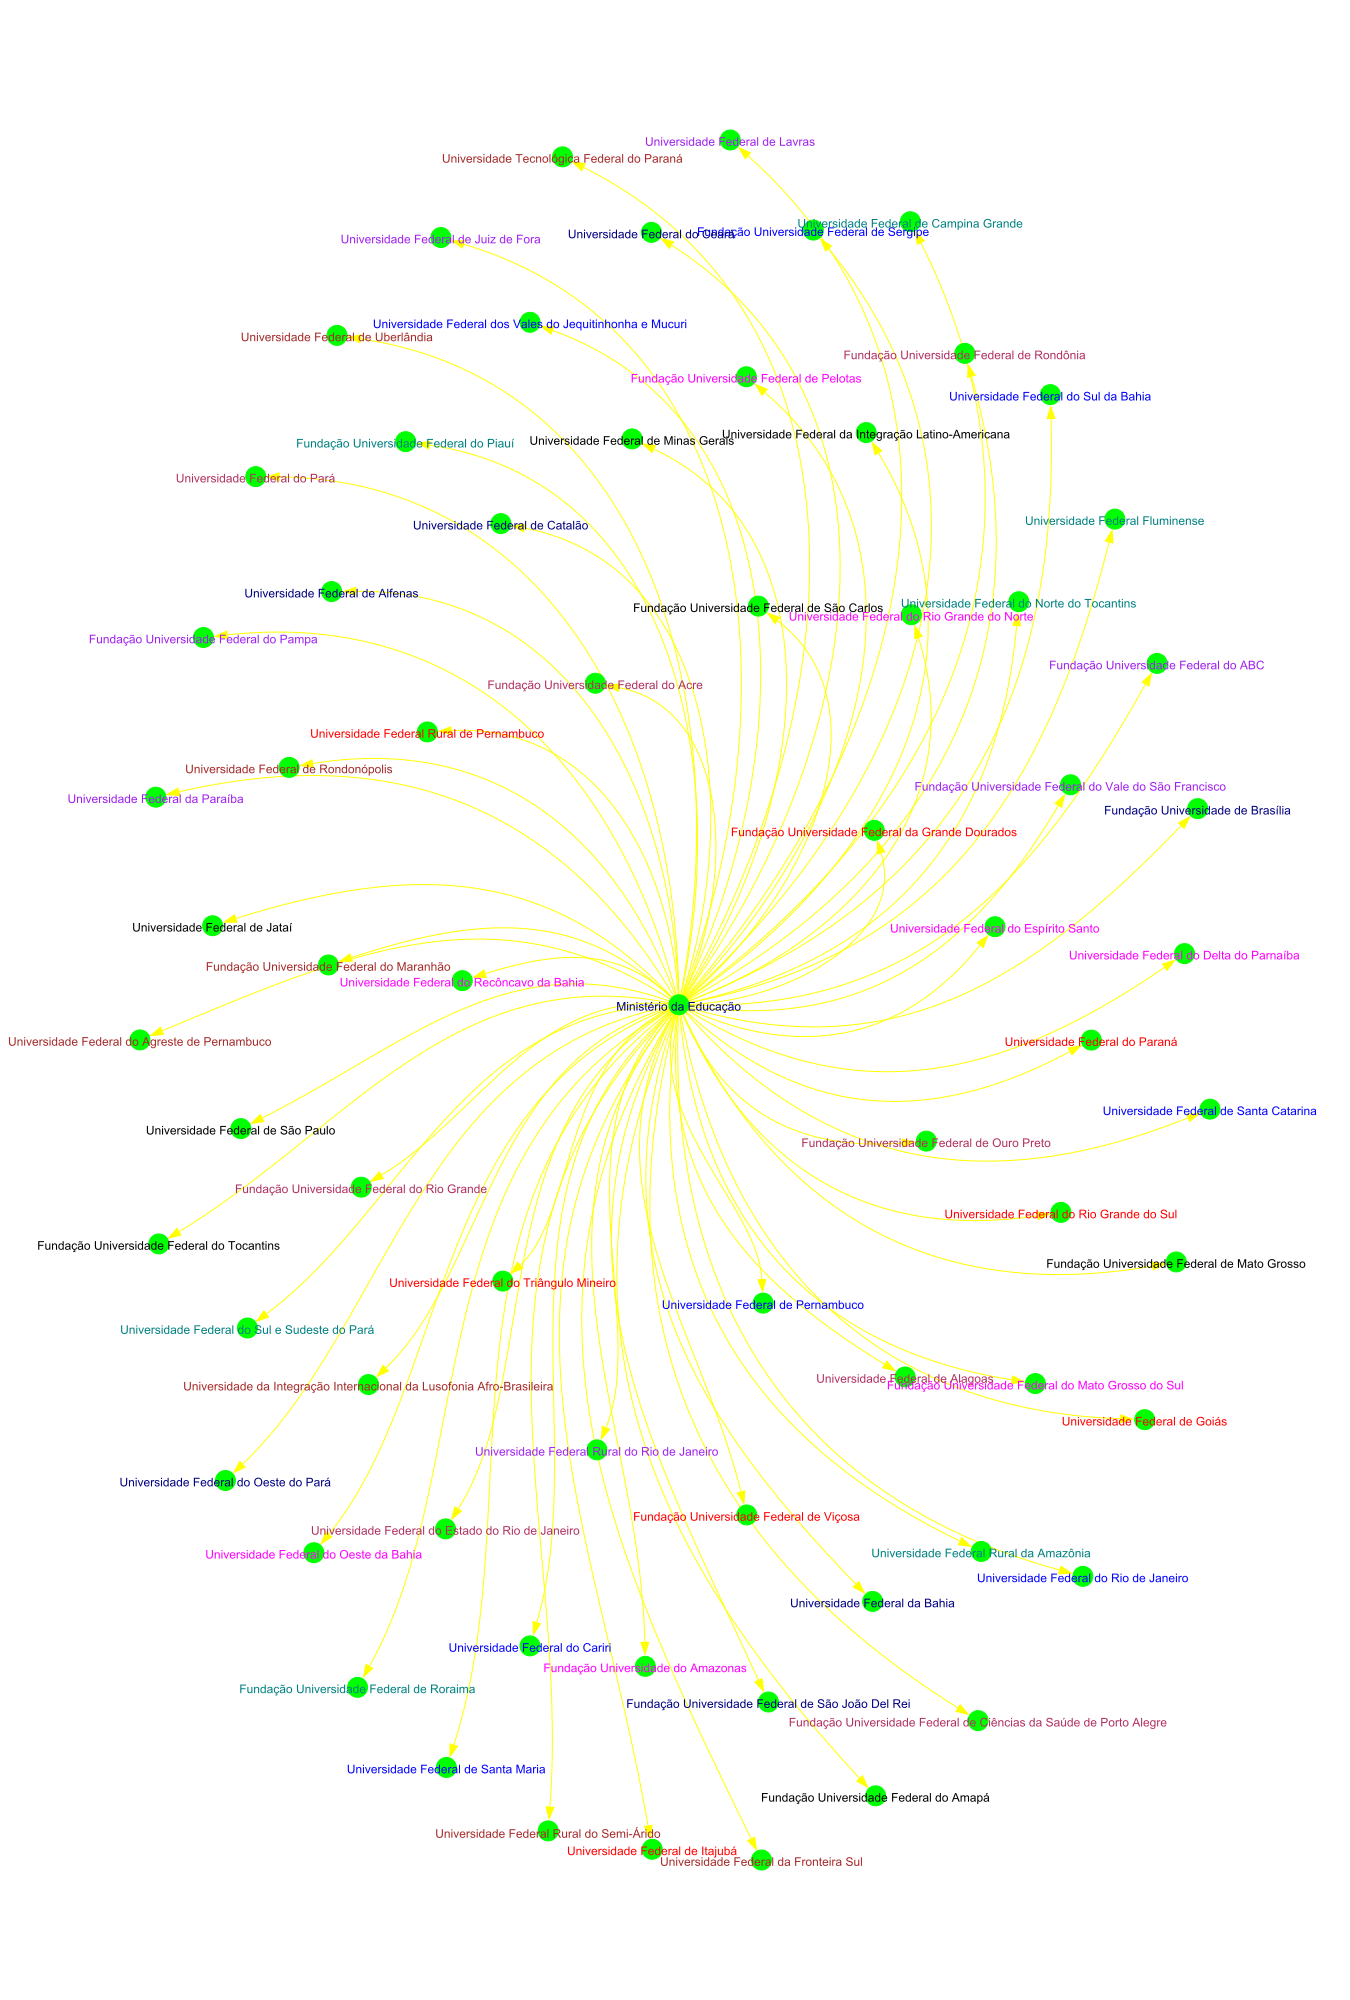

In [87]:
out_fig_name2021 = "grafo2021.eps"
grafo2021 = pickle.load(open("grafo2021.pkl", "rb"))
print(grafo2021.summary())
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2021.layout_reingold_tilford_circular()
plot(grafo2021, out_fig_name2021, **visual_style)

IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


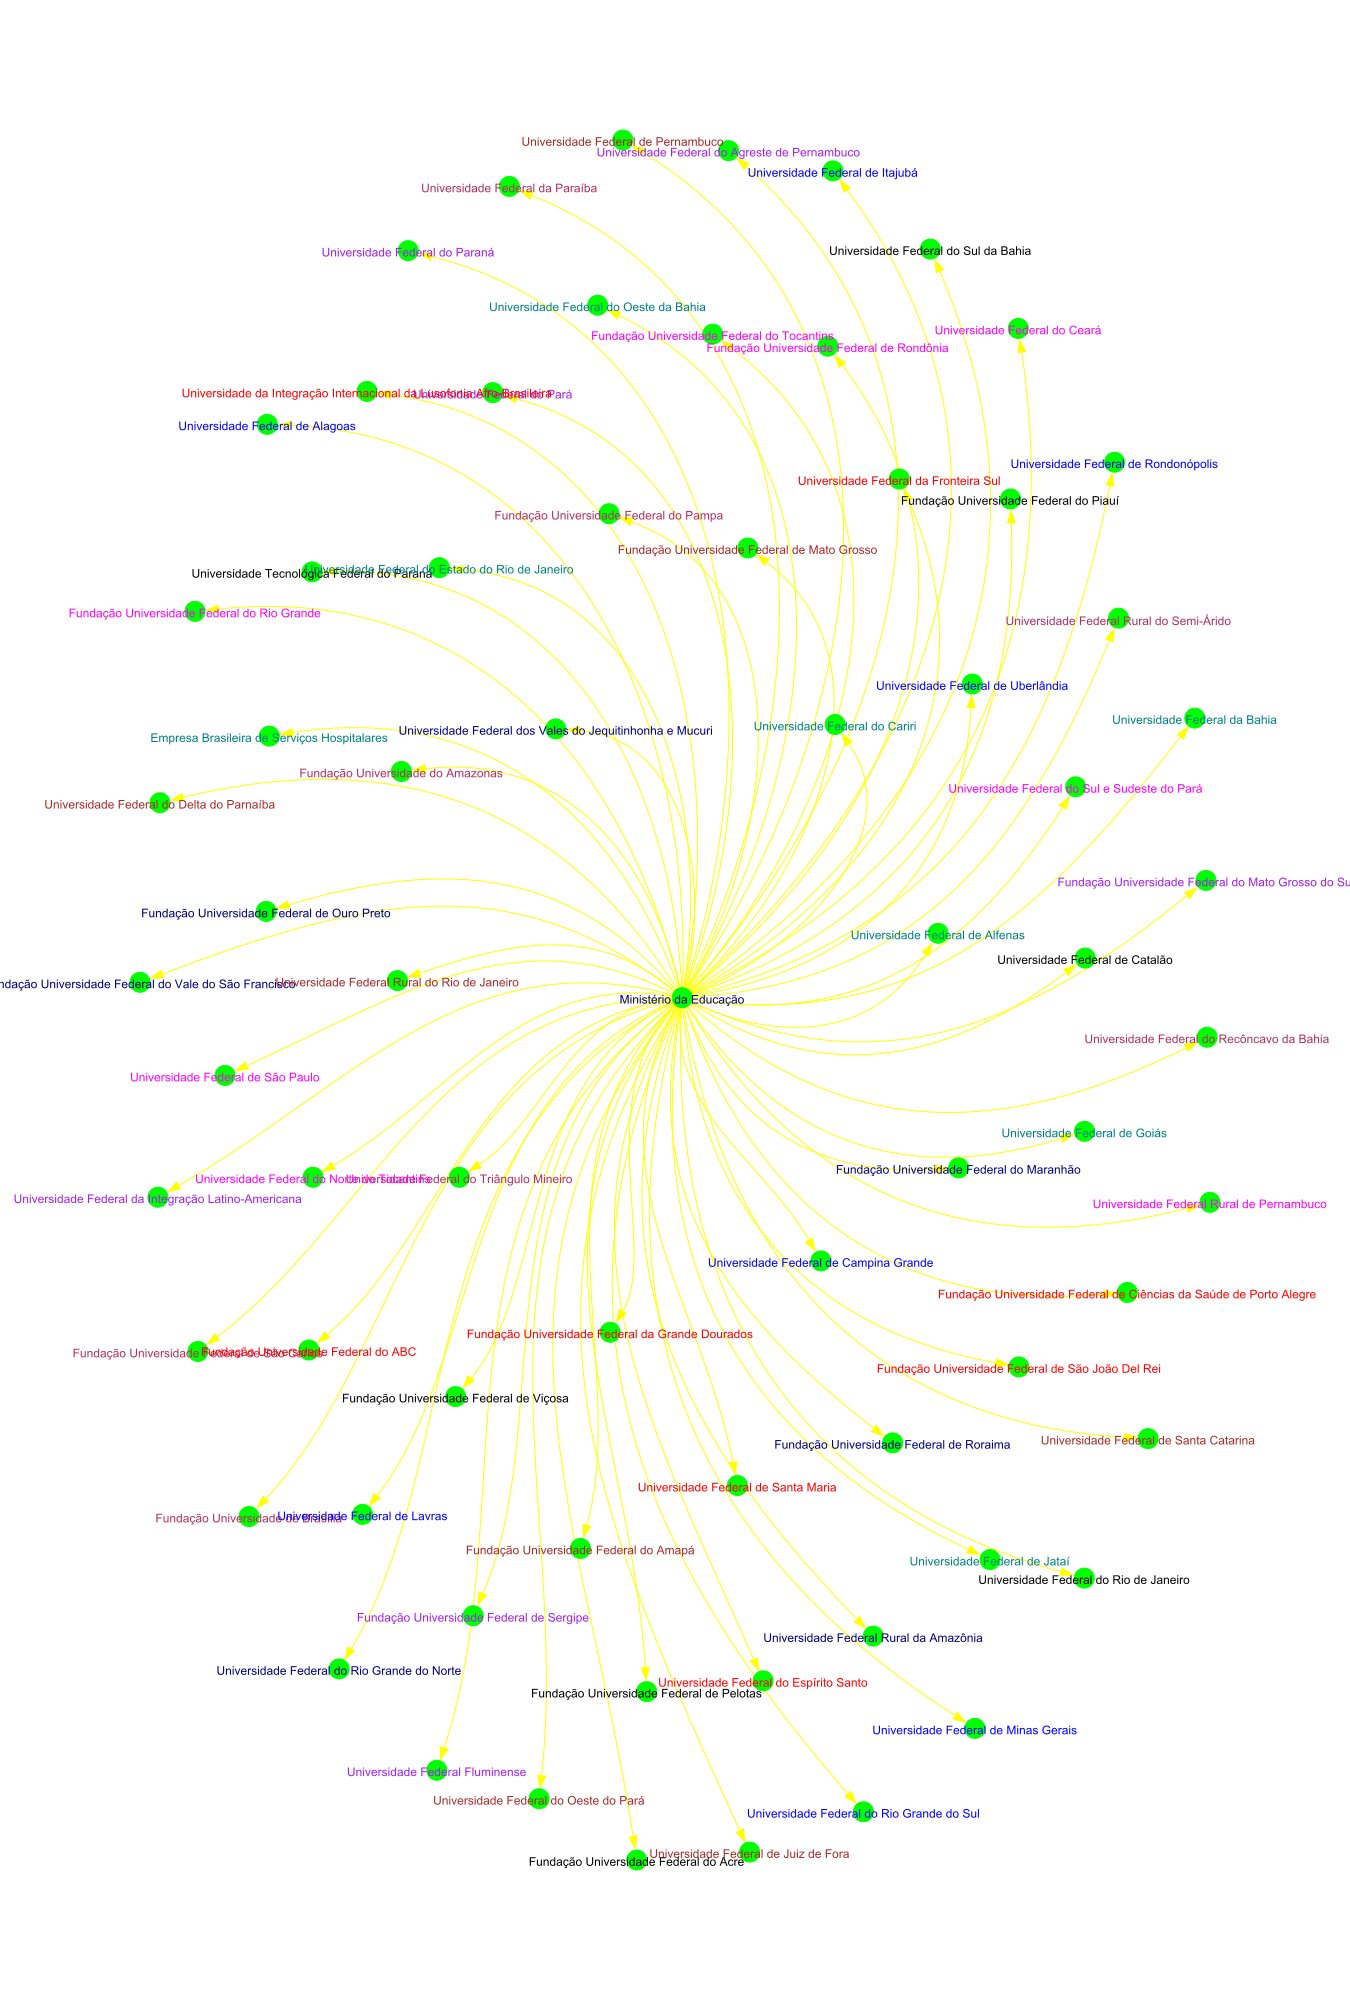

In [88]:
out_fig_name2022 = "grafo2022.eps"
grafo2022 = pickle.load(open("grafo2022.pkl", "rb"))
print(grafo2022.summary())
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2022.layout_reingold_tilford_circular()
plot(grafo2022, out_fig_name2022, **visual_style)

In [89]:
print(grafo2019.summary())
print(grafo2020.summary())
print(grafo2021.summary())
print(grafo2022.summary())


IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


IGRAPH DN-- 5 4 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)


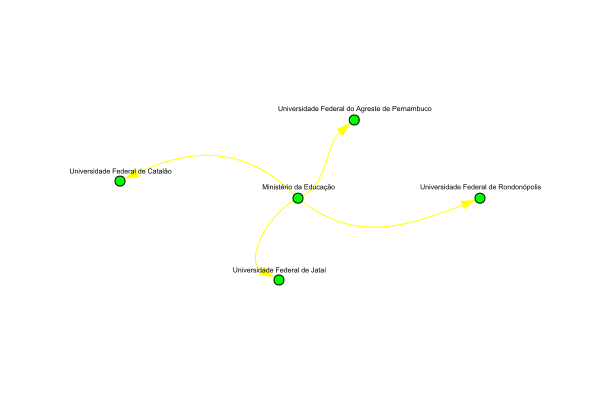

In [90]:
diff_in_2020 = grafo2020.difference(grafo2019)
sub_diff_in_2020 = diff_in_2020.subgraph_edges(diff_in_2020.es)
print(sub_diff_in_2020.summary())
visual_style = {}
visual_style["bbox"] = (600,400)
visual_style["margin"] = 120
visual_style["vertex_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 7
visual_style["edge_curved"] = True
visual_style["layout"] = sub_diff_in_2020.layout_reingold_tilford_circular()
plot(sub_diff_in_2020, "sub_diff_in_2020.eps", **visual_style)

IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)


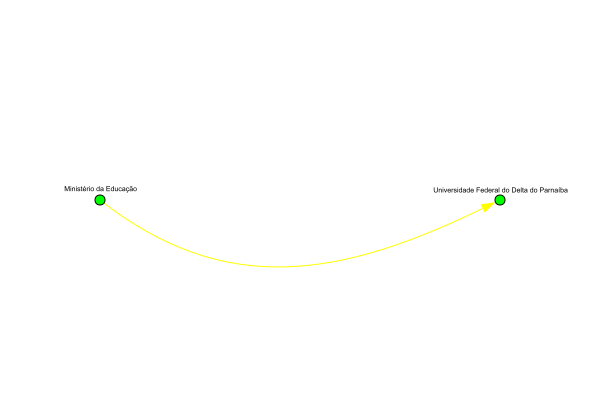

In [91]:
diff_in_2021 = grafo2021.difference(grafo2020)
sub_diff_in_2021 = diff_in_2021.subgraph_edges(diff_in_2021.es)
print(sub_diff_in_2021.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2021.layout_reingold_tilford_circular()
plot(sub_diff_in_2021, "sub_diff_in_2021.eps", **visual_style)

IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


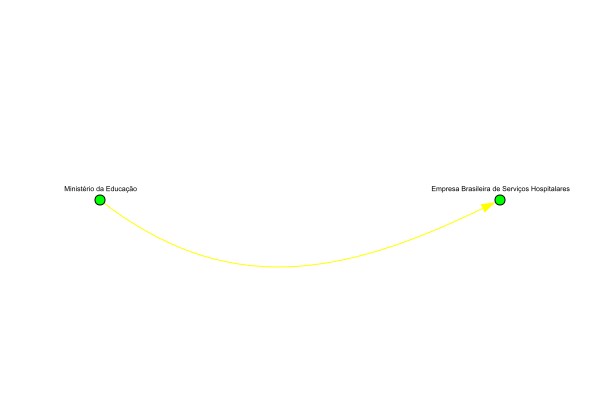

In [92]:
diff_in_2022 = grafo2022.difference(grafo2021)
sub_diff_in_2022 = diff_in_2022.subgraph_edges(diff_in_2022.es)
print(sub_diff_in_2022.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2022.layout_reingold_tilford_circular()
plot(sub_diff_in_2022, "sub_diff_in_2022.eps", **visual_style)

IGRAPH DN-- 7 6 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


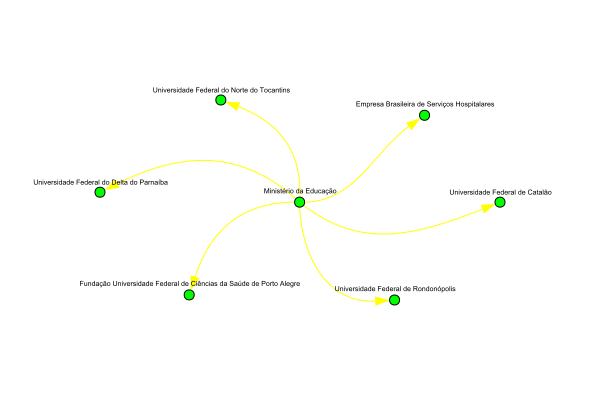

In [93]:
diff_in_2022_2019 = grafo2022.difference(grafo2019)
sub_diff_in_2022_2019 = diff_in_2022_2019.subgraph_edges(diff_in_2022.es)
print(sub_diff_in_2022_2019.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2022_2019.layout_reingold_tilford_circular()
plot(sub_diff_in_2022_2019, "sub_diff_in_2022_2019.eps", **visual_style)

In [94]:
big_frame

,id,tipo,emissor,data,responsavel,cargo
0,S01012019/1020_20190112_991201162-2,Decreto numerado,Atos do Poder Judiciário,12/01/2019,NaN,NaN
1,S01012019/1020_20190116_11391945,Lei,Atos do Poder Legislativo,16/01/2019,JAIR MESSIAS BOLSONARO,NaN
2,S01012019/515_20190102_11303736,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
3,S01012019/515_20190102_11303780,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
4,S01012019/515_20190102_11303801,Portaria,"Ministério da Ciência, Tecnologia, Inovações e...",02/01/2019,VILMA DE FÁTIMA ALVARENGA FANIS,NaN
...,...,...,...,...,...,...
3233679,S03112022/609_20221130_20116254,Aviso de Suspensão,Ministério da Defesa/Comando da Marinha/Empres...,30/11/2022,NAIR CARLA FROMENT TEIXEIRA,Pregoeira
3233680,S03112022/609_20221130_20116255,Resultado de Julgamento,Ministério da Economia/Empresa de Tecnologia e...,30/11/2022,MARIO HENRIQUE BERNARDO DA SILVA,Pregoeiro
3233681,S03112022/609_20221130_20116333,Extrato de Termo Aditivo,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN
3233682,S03112022/609_20221130_20116336,Extrato de Contrato,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN


IGRAPH DN-- 0 0 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)


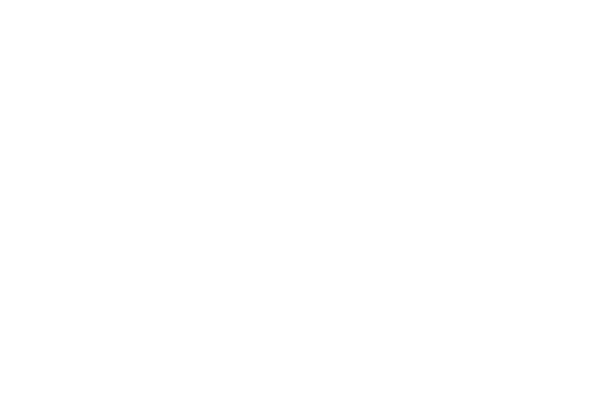

In [101]:
diff_out_2019_2022 = grafo2019.difference(grafo2022)
sub_diff_out_2019_2022 = diff_out_2019_2022.subgraph_edges(diff_in_2022.es)
print(sub_diff_out_2019_2022.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_out_2019_2022.layout_reingold_tilford_circular()
plot(sub_diff_out_2019_2022, "sub_diff_out_2019_2022.eps", **visual_style)

In [95]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Lavras')]
df_filtro


,id,tipo,emissor,data,responsavel,cargo
6062,S02012019/529_20190103_11362698,Portaria,Ministério da Educação/Universidade Federal de...,03/01/2019,RAFAEL PIO,NaN
6063,S02012019/529_20190103_11362699,Portaria,Ministério da Educação/Universidade Federal de...,03/01/2019,RAFAEL PIO,NaN
6064,S02012019/529_20190103_11362700,Portaria,Ministério da Educação/Universidade Federal de...,03/01/2019,RAFAEL PIO,NaN
6065,S02012019/529_20190103_11362701,Portaria,Ministério da Educação/Universidade Federal de...,03/01/2019,RAFAEL PIO,NaN
6066,S02012019/529_20190103_11362702,Portaria,Ministério da Educação/Universidade Federal de...,03/01/2019,RAFAEL PIO,NaN
...,...,...,...,...,...,...
3225664,S03112022/530_20221125_20102691,Extrato de Rescisão,Ministério da Educação/Universidade Federal de...,25/11/2022,NaN,NaN
3227663,S03112022/530_20221125_20105495,Extrato,Ministério da Educação/Universidade Federal de...,25/11/2022,NaN,NaN
3227664,S03112022/530_20221125_20105496,Extrato,Ministério da Educação/Universidade Federal de...,25/11/2022,NaN,NaN
3227665,S03112022/530_20221125_20105497,Extrato,Ministério da Educação/Universidade Federal de...,25/11/2022,NaN,NaN
